# Задание 1

In [2]:
import pandas as pd
import random
import datetime as dt
from tqdm import tqdm
from sqlalchemy import create_engine
import json

df_1 = pd.read_csv('adr.csv')
df_1.drop_duplicates(inplace=True)
df_1.drop(columns='Unnamed: 0', inplace=True)

num = []
while len(num) < 500:
    i = random.randint(0, 9000)
    if i not in num:
        num.append(i)
    else:
        continue

lst = list(df_1[df_1.index.isin(num)]['address'])
dct = []
for id in tqdm(range(1000)):
    adr = lst[random.randint(0,499)]
    date = dt.datetime.strptime('2015-10-25 00:01:00', '%Y-%m-%d %H:%M:%S')
    
    tmp = {'atm_id': id, 'adr': adr, 'dt_ins': date}
    dct.append(tmp)
    iter = random.randint(1000,1500)
    for _ in range(iter):
        date += dt.timedelta(hours=random.randint(30,100))
        ii = random.randint(0,1)
        if ii == 0:
            tmp = {'atm_id': id, 'adr': adr, 'dt_ins': date}
            dct.append(tmp)
        else:
            adr = lst[random.randint(0,499)]
            
            tmp = {'atm_id': id, 'adr': adr, 'dt_ins': date}
            dct.append(tmp)

df = pd.DataFrame(data=dct)
df.info()
df.head()


100%|██████████| 1000/1000 [00:07<00:00, 128.56it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248473 entries, 0 to 1248472
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   atm_id  1248473 non-null  int64         
 1   adr     1248473 non-null  object        
 2   dt_ins  1248473 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 28.6+ MB


,atm_id,adr,dt_ins
0,0,"Большой Златоустинский переулок, 1, строение 1",2015-10-25 00:01:00
1,0,"1-я Тверская-Ямская улица, 34",2015-10-28 13:01:00
2,0,"1-я Тверская-Ямская улица, 34",2015-10-30 01:01:00
3,0,"Люблинская улица, владение 155, строение 1",2015-11-03 01:01:00
4,0,"улица Петра Романова, 6",2015-11-05 07:01:00


# Задание 2А

In [59]:
import pandas as pd
import numpy as np

df_1 = pd.read_excel('1.xlsx')
df_2 = pd.read_excel('2.xlsx')

df_1.rename(columns={'Координаты': 'coord', 'Дата операции': 'date'}, inplace=True)
df_2.rename(columns={'Координаты': 'coord', 'Дата операции': 'date'}, inplace=True)


df_1[['lat_1', 'long_1']] = df_1['coord'].str.split(',', 1 , expand= True )
df_2[['lat_2', 'long_2']] = df_2['coord'].str.split(',', 1 , expand= True )

df_1['id'] = 0
df_2['id'] = 0

df = df_1.merge(df_2, on = 'id')

df = df.fillna(0)
df = df.astype({'lat_1': 'float',
                    'long_1': 'float',
                    'lat_2': 'float',
                    'long_2': 'float'})
                    
df['diff'] = round(np.sqrt(((df.lat_2-df.lat_1)*111.32)**2 + ((df.long_2-df.long_1)*111.32*np.cos(df.lat_2 *(np.pi/180)))**2), 2) 
df.drop(columns=['lat_1', 'long_1', 'id', 'lat_2', 'long_2'], inplace=True)

df.sort_values(by='date_x').head(10)

,date_x,coord_x,date_y,coord_y,diff
216026,2020-01-01 12:12:04,"55.8143736 , 37.3621306",2021-01-01 14:04:03,"0 , 0",7476.84
215904,2020-01-01 12:12:04,"55.8143736 , 37.3621306",2021-05-26 15:39:15,"55.67823238 , 37.50065933",17.47
215903,2020-01-01 12:12:04,"55.8143736 , 37.3621306",2021-05-26 15:40:14,"55.67823238 , 37.50065933",17.47
215902,2020-01-01 12:12:04,"55.8143736 , 37.3621306",2021-05-26 16:41:50,"55.67823238 , 37.50065933",17.47
215901,2020-01-01 12:12:04,"55.8143736 , 37.3621306",2021-05-26 16:42:27,"55.67823238 , 37.50065933",17.47
215900,2020-01-01 12:12:04,"55.8143736 , 37.3621306",2021-05-27 09:54:54,"55.67823238 , 37.50065933",17.47
215899,2020-01-01 12:12:04,"55.8143736 , 37.3621306",2021-05-30 06:59:34,"55.6734553 , 37.4645263",16.95
215898,2020-01-01 12:12:04,"55.8143736 , 37.3621306",2021-05-30 13:50:48,"0 , 0",7476.84
215897,2020-01-01 12:12:04,"55.8143736 , 37.3621306",2021-06-01 06:38:52,"55.6734553 , 37.4645263",16.95
215896,2020-01-01 12:12:04,"55.8143736 , 37.3621306",2021-06-01 06:40:11,"55.6734553 , 37.4645263",16.95


# Задание 2Б

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime as dt
import random
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [4]:
def foo(df=None, dt1=None, lat=None, long=None):
    
    df = df.sort_values(by='date', ascending=True)
    def di(x, y):
        dist = round(np.sqrt(((x-lat)*111.32)**2 + ((y-long)*111.32*np.cos(x*(np.pi/180)))**2))
        return float(dist)

    d = {'prev_activ_hours': None,
         'prev_activ_dist': None,
         'next_activ_hours': None,
         'next_activ_dist': None,
         'prev_cnt_act': None,
         'next_cnt_act': None,
         'flg': -1}
    
    # 1
    a = df[df['date'] < dt1].tail(1)
    if a.shape[0] == 0:
        pass
    else:
        prev_activ_hours = dt1 - a.iloc[0][0]
        d['prev_activ_hours'] = int(prev_activ_hours.total_seconds()/3600)
    # 2
        x = a['lat']
        y = a['long']
        d['prev_activ_dist'] = di(x,y) 
    # 3
    
    a = df[df['date'] > dt1].head(1)
    if a.shape[0] == 0:
        pass
    else:  
        next_activ_hours = a.iloc[0][0] - dt1
        d['next_activ_hours'] = int(next_activ_hours.total_seconds()/3600)
        
    #4
        x = a['lat']
        y = a['long']
        d['next_activ_dist'] = di(x,y) 
    # 5 
    a = df[(df['date'] < dt1) & (df['date'] >= dt1 - pd.Timedelta('365 days'))]
    
    if a.shape[0] == 0:
        pass
    else:
        a['diff'] = np.sqrt(((a.lat-lat)*111.32)**2 + ((a.long-long)*111.32*np.cos(a.lat*(np.pi/180)))**2)
        d['prev_cnt_act'] = a[a['diff'] <= 1 ].shape[0]
        
    # 6
    a = df[(df['date'] > dt1) & (df['date'] <= dt1 + pd.Timedelta('365 days'))]
    if a.shape[0] == 0:
        pass
    else:
        a['diff'] = np.sqrt(((a.lat-lat)*111.32)**2 + ((a.long-long)*111.32*np.cos(a.lat*(np.pi/180)))**2)
        d['next_cnt_act'] = a[a['diff'] <= 1 ].shape[0]
             
    
    if (d['prev_activ_hours'] is not None and d['prev_activ_hours'] < 336
        ) and (d['next_activ_hours'] is not None and d['next_activ_hours'] < 336
               ) and (d['prev_activ_dist'] is not None and d['prev_activ_dist'] < 15
                      ) and (d['next_activ_dist'] is not None and d['next_activ_dist'] < 15
                             ) and ((d['prev_cnt_act'] is not None and d['prev_cnt_act'] > 0
                                    ) or (d['next_cnt_act'] is not None and d['next_cnt_act'] > 0)
                                           ):
        d['flg'] = 1
    
    elif (d['prev_activ_hours'] is not None and d['prev_activ_hours'] < 5
        ) and (d['next_activ_hours'] is not None and d['next_activ_hours'] < 5
               ) and (d['prev_activ_dist'] is not None and d['prev_activ_dist'] > 100
                      ) and (d['next_activ_dist'] is not None and d['next_activ_dist'] > 100
                             ) and (d['prev_cnt_act'] is None or d['prev_cnt_act'] == 0
                                    ) and (d['next_cnt_act'] is None or d['next_cnt_act'] == 0
                                           ):
        d['flg'] = 0    
    return d


#### поиск в файле по параметрам

In [57]:
df = pd.read_excel('123.xlsx')

In [58]:
df = df.rename(columns={'Дата операции': 'date', 'Координаты': 'coord'})
dttm = pd.to_datetime('2020-02-29 10:53:34')
lat, long = 55.9226108, 37.5313959
df[['lat', 'long']] = df['coord'].str.split(',', 1 , expand= True )

df = df.astype({'lat': 'float',
                    'long': 'float'})

print(list(foo(df=df, dt1 = dttm, lat = lat, long = long).values()))
df.drop(columns=['lat', 'long'], inplace=True)


[44, 16.0, 77, 16.0, 0, 0, -1]


#### генерация DF

In [5]:
def gen(beg):
    date = beg + dt.timedelta(hours=random.normalvariate(0,2500)) + dt.timedelta(seconds=random.randint(0,99))
    lat = round(random.uniform(55.5,57), 6)
    long = round(random.uniform(37,38), 6)
    
    
    
    return date, lat, long

100%|██████████| 5000/5000 [01:28<00:00, 56.68it/s]


мин: 2014-09-23 03:36:20.545120 ------ макс: 2016-10-10 04:56:59.661284
количество дней:  748
[-1, 0, 1]
STD: 2513


(5000, 3)

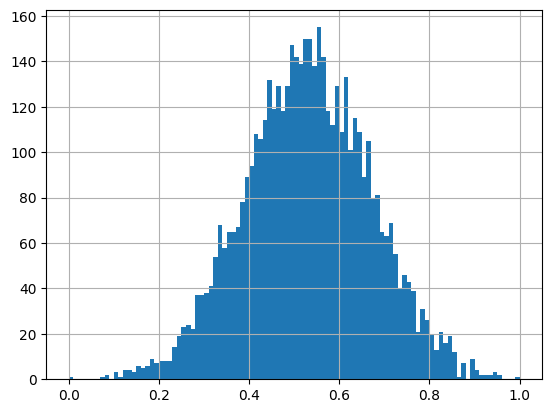

In [6]:
ddf = {'date': '', 'lat': [], 'long': []}
ddf = pd.DataFrame(data=ddf, index=[])
res = []
cnt = 5000 # количество строк/итераций

f = '%Y-%m-%d %H:%M:%S'
beg = dt.datetime.strptime('2015-10-25 00:00:00', f)

for i in tqdm(range(cnt)): 
    date, lat, long = gen(beg)
    dd = {'date': date,
            'lat': lat,
            'long': long}
    
    ddf = pd.concat([ddf,pd.DataFrame(dd, index=[0])])
    res.append(foo(df=ddf, dt1 = date, lat = lat, long = long))

results = pd.DataFrame(data=res)
ddf.reset_index(drop=True, inplace=True)
results['flg'] = results['flg'].astype('int')
print(f'мин: {ddf.date.min()} ------ макс: {ddf.date.max()}')
print(f'количество дней:  {abs((ddf.date.max() - ddf.date.min()).days)}')
print(list(results['flg'].unique()))
std = round(np.std(ddf['date'].map(lambda x: dt.datetime.timestamp(x)))/3600)
print('STD:', std)
q = ddf['date']
q = q.map(lambda x: dt.datetime.timestamp(x))
df_norm = (q-q.min())/ (q.max() - q.min())
df_norm.hist(bins=100)
ddf.shape

In [7]:
ddf.head()

,date,lat,long
0,2015-06-12 03:18:45.981889,56.377378,37.362577
1,2016-01-16 09:52:20.931420,56.372797,37.088536
2,2015-07-03 12:19:16.430444,55.978682,37.474824
3,2015-03-19 08:48:25.699464,56.128307,37.132695
4,2016-02-22 16:11:42.734913,56.362043,37.389217


In [9]:
results.head()

,prev_activ_hours,prev_activ_dist,next_activ_hours,next_activ_dist,prev_cnt_act,next_cnt_act,flg
0,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,5238.0,17.0,NaN,NaN,0.0,NaN,-1
2,513.0,45.0,4725.0,50.0,0.0,0.0,-1
3,NaN,NaN,2034.0,31.0,NaN,0.0,-1
4,894.0,19.0,NaN,NaN,0.0,NaN,-1


In [8]:
dd = ddf['date'] - beg
dd = dd.apply(lambda x: x.total_seconds()/3600)

print(f'Среднее:{dd.mean().round(2)}\nМедиана: {dd.median().round(2)}\nSTD: {np.std(dd).round(2)}')
print(len(dd[abs(dd) < std*3]) / len(dd)*100)

dft = pd.DataFrame()
for i in range(1,11):
    name = f'sample_{i}'
    dft[name] = random.sample(list(dd),1000)
for i in dft.columns:
    print(st.t.interval(alpha=0.95, df=len(dft[i])-1, loc=np.mean(dft[i]), scale=st.sem(dft[i])))


Среднее:-11.03
Медиана: -12.8
STD: 2512.96
99.78
(-22.368024103164856, 289.19392977501036)
(-134.46008959403557, 177.62985850692556)
(-198.6940449523521, 112.51710493619436)
(-278.60526015309705, 30.669752047716486)
(-251.52416791312834, 65.34228374073221)
(-253.7256545259288, 62.342705455807746)
(-172.85283887940167, 140.57702804943338)
(-186.47582437687515, 120.65897362976845)
(-166.86172916637133, 145.8674701659591)
(-184.6578792629762, 120.22118595280787)


In [10]:
dd = pd.Series([random.gauss(0, 500) for i in range(1000000)])


print(f'Среднее:{dd.mean().round(2)}\nМедиана: {dd.median().round(2)}\nSTD: {np.std(dd).round(2)}')
print(len(dd[abs(dd) < std*3]) / len(dd)*100)

dft = pd.DataFrame()
for i in range(1,11):
    name = f'sample_{i}'
    dft[name] = random.sample(list(dd),1000)

a = dd
for i in dft.columns:
    b = dft[dft[i]<950][i]
    tt = st.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    alpha = 0.05
    print('Доверительный интервал:',st.t.interval(alpha=0.99999, df=len(dft[i])-1, loc=np.mean(dft[i]), scale=st.sem(dft[i])))
    if tt[1]<alpha:
        print(f'p-value: {round(tt[1],2)} --- существует статистически значимое различие между двумя средними\n')
    else:
        print(f'p-value: {round(tt[1],2)} --- НЕТ статистически значимого различия между двумя средними\n')


Среднее:0.32
Медиана: 0.5
STD: 499.59
100.0
Доверительный интервал: (-70.95829198696295, 66.88415845602685)
p-value: 0.03 --- существует статистически значимое различие между двумя средними

Доверительный интервал: (-66.69570835700048, 74.55277494279768)
p-value: 0.02 --- существует статистически значимое различие между двумя средними

Доверительный интервал: (-86.42454748657008, 54.70798363288388)
p-value: 0.0 --- существует статистически значимое различие между двумя средними

Доверительный интервал: (-70.33074484905464, 73.61804592630752)
p-value: 0.06 --- НЕТ статистически значимого различия между двумя средними

Доверительный интервал: (-77.77817365395386, 63.19012809309075)
p-value: 0.0 --- существует статистически значимое различие между двумя средними

Доверительный интервал: (-90.51285476593695, 48.8622513792067)
p-value: 0.0 --- существует статистически значимое различие между двумя средними

Доверительный интервал: (-72.79901326561385, 66.93540822846127)
p-value: 0.02 --- су

In [12]:
dft.describe()

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-2.037067,3.928533,-15.858282,1.643651,-7.294023,-20.825302,-2.931803,14.625685,0.564502,-8.469832
std,490.879588,503.009030,502.596106,512.625268,502.011258,496.337627,497.617208,499.527623,496.893136,501.823941
min,-1779.730550,-1606.174876,-1547.683875,-1545.339963,-1736.925815,-1869.383586,-1489.717711,-1462.897783,-1781.390411,-1637.766518
25%,-324.866234,-335.953710,-343.453081,-360.654845,-320.504165,-346.873589,-337.068176,-345.668720,-330.100424,-337.798147
50%,18.948334,-4.661147,-4.535718,9.711817,18.365207,-33.815363,-18.463665,14.185945,0.674682,-20.982159
75%,319.225277,336.674184,311.775448,359.640405,306.785670,302.601584,331.564398,359.249970,331.831000,320.155957
max,1423.678772,1694.630501,1560.452450,1631.750574,1852.168291,1668.367695,1799.746274,1555.121356,1433.477714,1831.182241


<AxesSubplot: >

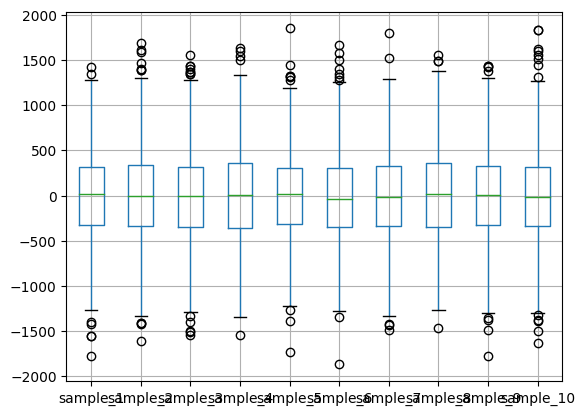

In [13]:
dft.boxplot()

<AxesSubplot: >

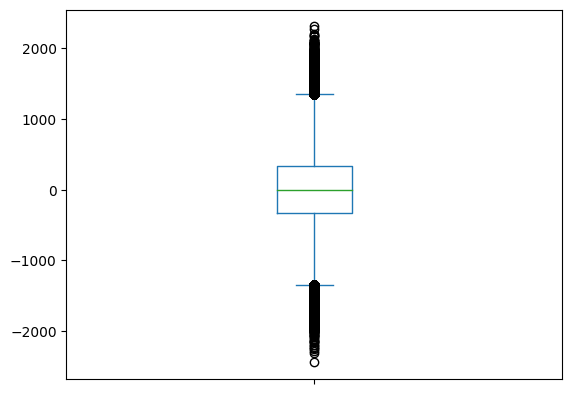

In [14]:
dd.plot.box()